In [3]:
## Code Header #######
## Notebook Name: Kickstarter Analysis
## Objective: To learn which design decisions help kickstarter campaigns succeed and to predict the successes of any kickstarter campaigns.
## Start Date: 11th April 2020
## Data Sources
    # Source 1: Webscraped kickstarter data - Scraped by Web Robots - https://webrobots.io/kickstarter-datasets/
## Edits to be made
## Questions about the context
    # Does every backer pledge a fixed amount? Or can backers decide the pledge amount?
## Structure of the analysis
    # Data Input: Read all the columns in the right format
    # Run analysis for a single file first, but replicate for all files together.( Is there a way to batch execute)
    # Feature Engineering
        # Blurb : Brief text explaining the project
        # Calculate campaign length
        # Average pledge by backer
        # Extract the categories from the dictionary.
    # EDA
        # Glean insights which might help design decisions
    # SciKit Learn
        # Logistic Regression; Glean insights which might help design decisions
        # Trees
        # Neural Network
    
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
import numpy as np
import os
import json
import ast
from datetime import datetime
from sklearn.model_selection import train_test_split
import textstat
import math
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn import metrics as sk_metrics
import glob
os.getcwd()

'C:\\Users\\sthal\\Python Scripts'

In [1]:
import pandas as pd, numpy as np, scipy as sp, sklearn ,nltk, matplotlib.pyplot as plt, seaborn as sb,plotly as ply, statsmodels as stat, tabulate,pickle

# Import and append 'input' data

In [3]:
# Import and append all datafiles

import glob
path = r'C:\Users\Hi\Documents\UC BANA Master\1. Coursework\5. Spring - Data Mining 2\3.Homework and Assignments\Final Project\Kickstarter Success Analysis\Data\Kickstarter_2020-01-16T03_20_15_556Z'

all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
input = pd.concat(li, axis=0, ignore_index=True)

In [64]:
input.shape

(211271, 38)

In [7]:
input.head(10)

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,6,Das Good Inc goal is to make cooking easy and ...,"{""id"":312,""name"":""Restaurants"",""slug"":""food/re...",266.0,US,the United States,1534710982,"{""id"":407371466,""name"":""Anh Vongbandith"",""slug...",USD,$,...,help-get-das-good-seasonings-and-sauces-to-sup...,https://www.kickstarter.com/discover/categorie...,False,False,failed,1549236382,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",266.0,international
1,2,A web series about the soul crushing exercise ...,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",260.0,US,the United States,1480480200,"{""id"":1660574317,""name"":""Blakely Thornton"",""is...",USD,$,...,the-applicant-interviews-are-hell,https://www.kickstarter.com/discover/categorie...,False,False,failed,1485351921,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",260.0,domestic
2,3,"A photographic essay on the historic, incompar...","{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",185.0,US,the United States,1478033617,"{""id"":125092605,""name"":""David Baez"",""is_regist...",USD,$,...,pictures-of-veracruz,https://www.kickstarter.com/discover/categorie...,False,False,failed,1479302424,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",185.0,international
3,2,A romantic comedy mini series following a self...,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",35.0,US,the United States,1516675034,"{""id"":280516405,""name"":""Jordan Lakomiak"",""slug...",USD,$,...,5-reasons-to-hate-christmas,https://www.kickstarter.com/discover/categorie...,False,False,failed,1525977197,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",35.0,domestic
4,8,The Drums of Atlant is an original science fic...,"{""id"":301,""name"":""Science Fiction"",""slug"":""fil...",261.0,US,the United States,1554695036,"{""id"":1081096082,""name"":""AsteronX"",""is_registe...",USD,$,...,the-drums-of-atlant,https://www.kickstarter.com/discover/categorie...,False,False,failed,1558056215,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",261.0,domestic
5,2,"""...a real photographer will make you look twi...","{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",26.0,US,the United States,1436371102,"{""id"":1705644190,""name"":""Kayla Young"",""is_regi...",USD,$,...,ordinary-beauty,https://www.kickstarter.com/discover/categorie...,False,False,failed,1437681874,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",26.0,international
7,0,"Es nuestra ilusión, tener nuestro propio resta...","{""id"":312,""name"":""Restaurants"",""slug"":""food/re...",0.0,ES,Spain,1463041220,"{""id"":332712378,""name"":""Cristina"",""is_register...",EUR,€,...,restaurante-les-llums,https://www.kickstarter.com/discover/categorie...,False,False,failed,1466318457,1.124549,"{""web"":{""project"":""https://www.kickstarter.com...",0.0,international
8,16,"A relaxing teaching tool, this coloring book f...","{""id"":45,""name"":""Art Books"",""slug"":""publishing...",555.0,US,the United States,1472564479,"{""id"":310369046,""name"":""Mary Frances Millet"",""...",USD,$,...,the-history-of-schenectady-coloring-book,https://www.kickstarter.com/discover/categorie...,False,False,failed,1475857504,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",555.0,domestic
9,5,Floating above the planet Ithor on Tafanda Bay...,"{""id"":301,""name"":""Science Fiction"",""slug"":""fil...",76.0,US,the United States,1459300963,"{""id"":1482228519,""name"":""Adam Wintz"",""is_regis...",USD,$,...,adam-and-scotts-star-wars-fan-film-project,https://www.kickstarter.com/discover/categorie...,False,False,failed,1464754571,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",76.0,domestic
10,66,"Social, environmental and

In [6]:
input['response'] = input.state.apply(lambda x: 1 if x =='successful' else 0)

# Create additional features

## Features on subcategory

In [66]:
input_f = input.copy()

input_f.dropna(subset = ["blurb"],axis=0,inplace=True)
input_f.shape

(211263, 39)

In [27]:
input_f.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'country_displayable_name', 'created_at', 'creator',
       'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'disable_communication', 'friends',
       'fx_rate', 'goal', 'id', 'is_backing', 'is_starrable', 'is_starred',
       'launched_at', 'location', 'name', 'permissions', 'photo', 'pledged',
       'profile', 'slug', 'source_url', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'static_usd_rate', 'urls', 'usd_pledged',
       'usd_type', 'response'],
      dtype='object')

In [67]:
import ast

# Converting each value in the 'category' column to a dictionary
input_f['cat_dict'] = input_f.category.apply(ast.literal_eval)

# Creating new columns to store the category information
len(input_f)
input_f['category'] = ''
input_f['sub_category'] = ''

# Defining a function to read the dictionary and extract the required values
def categorize(dictionary):
    if 'parent_name' in dictionary:
        return (dictionary['parent_name'], dictionary['name'])
    else:
        return (dictionary['name'], None)


# Applying this function to the category dictionary field in the input_f dataset
category_tuples = input_f.cat_dict.apply(categorize)

# The result was a series of tuples, we must now split up these tuples and assign them appropriately to the required columns
input_f.category = pd.DataFrame(category_tuples.tolist())[0]
input_f.sub_category = pd.DataFrame(category_tuples.tolist())[1]


In [68]:
# Removing duplicates at profile level with keeping the last source_url value
input_f = input_f.drop_duplicates(subset = 'profile', keep = 'last')
input_f.reset_index();

In [69]:
input_f.shape

(185996, 41)

In [70]:
# Subcategory volume index

subcateg_projects = input_f.groupby(['category','sub_category'])[['profile']].count().rename(columns={'profile':'no_projects_subcat'}).reset_index()
categ_projects = subcateg_projects.groupby(['category'])[['no_projects_subcat']].mean().rename(columns={'no_projects_subcat':'avg_projects_categ'}).reset_index()

subcateg_projects = pd.merge(subcateg_projects,categ_projects,how='left',on='category')

subcateg_projects['subcat_volume_index'] = subcateg_projects['no_projects_subcat']/subcateg_projects['avg_projects_categ']

subcateg_projects = subcateg_projects[['sub_category','subcat_volume_index']].drop_duplicates(subset='sub_category',keep='first')

In [71]:
# Subcategory success rate

subcateg_projectsuccess = input_f.groupby(['sub_category'], as_index=False).agg({'profile':'count','response':'sum'})
subcateg_projectsuccess.columns = subcateg_projectsuccess.columns.get_level_values(0)
subcateg_projectsuccess['subcateg_successrate'] = subcateg_projectsuccess['response']/subcateg_projectsuccess['profile']

In [72]:
subcateg_vars= pd.merge(subcateg_projects,subcateg_projectsuccess[['sub_category','subcateg_successrate']],how='left',on='sub_category')

In [53]:
display(subcateg_vars)

,sub_category,subcat_volume_index,subcateg_successrate
0,Ceramics,0.281869,0.494382
1,Conceptual Art,0.808393,0.526934
2,Digital Art,1.354711,0.527762
3,Illustration,1.620744,0.567171
4,Installations,0.448931,0.509700
...,...,...,...
140,Space Exploration,0.307128,0.548105
141,Wearables,1.254477,0.510350
142,Immersive,0.637698,0.529412
143,Musical,1.613001,0.563195


In [73]:
subcateg_features = np.array(pd.merge(input_f[['sub_category']],subcateg_vars,how='left',on='sub_category').drop(['sub_category'],axis=1).replace(np.nan,0))

In [83]:
# subcateg_features.shape
# print(subcateg_features)
# input_f.isna().sum()
# display(input_f)
input_f.shape

(185996, 41)

# Text Cleaning

In [4]:
# Removing duplicates at profile level with keeping the last source_url value
input = input.drop_duplicates(subset = 'profile', keep = 'last')
input.dropna(subset = ["blurb"],axis=0,inplace=True)
input.reset_index();

In [7]:
df = input[['blurb','response']].copy()
df.shape

(185996, 2)

In [20]:
df['processedtext'] = df['blurb'].str.replace('[^\w\s]','') # remove punctuations 
df['processedtext'] = df['processedtext'].apply(lambda x: str(x))
df['processedtext'] = df['processedtext'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) # Remove stopwords
df['processedtext'] = df['processedtext'].apply(lambda x: " ".join(x.lower() for x in x.split())) # convert to lowercase

In [25]:
# Remove words with length <3

def short_word_removal(s):
    wordlist = s.split()
    s2 = ' '.join(w for w in wordlist if len(w) >2)
    return s2

df['processedtext'] = df['processedtext'].apply(short_word_removal)

In [26]:
df.head(50)

,blurb,response,processedtext
0,Das Good Inc goal is to make cooking easy and ...,0,das good inc goal make cooking easy delicious ...
1,A web series about the soul crushing exercise ...,0,web series soul crushing exercise commonly kno...
2,"A photographic essay on the historic, incompar...",0,photographic essay historic incomparably color...
3,A romantic comedy mini series following a self...,0,romantic comedy mini series following self pro...
4,The Drums of Atlant is an original science fic...,0,the drums atlant original science fiction seri...
5,"""...a real photographer will make you look twi...",0,real photographer make look twice something or...
7,"Es nuestra ilusión, tener nuestro propio resta...",0,nuestra ilusión tener nuestro propio restauran...
8,"A relaxing teaching tool, this coloring book f...",0,relaxing teaching tool coloring book kids adul...
9,Floating above the planet Ithor on Tafanda Bay...,0,floating planet ithor tafanda bay evil sith lo...
10,"Social, environmental and cultural project tha...",1,social environmental cultural project seeks re...


# Language detection flag

In [27]:
df.dropna(axis=0,inplace=True)

import langdetect
from langdetect import detect


def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"

df['language'] = df['processedtext'].apply(detect_language)  

Note: you may need to restart the kernel to use updated packages.


In [8]:
df['language'] = df['language'].apply(lambda x: 'english' if x == 'en' else ('spanish' if x == 'es' else ('french' if x == 'fr' else('italian' if x == 'it' else 'other'))))

In [71]:
df.head(10)

,blurb,response,processedtext,language,language_full
0,Das Good Inc goal is to make cooking easy and ...,0,das good inc goal make cooking easy delicious ...,en,english
1,A web series about the soul crushing exercise ...,0,web series soul crushing exercise commonly kno...,en,english
2,"A photographic essay on the historic, incompar...",0,photographic essay historic incomparably color...,en,english
3,A romantic comedy mini series following a self...,0,romantic comedy mini series following self pro...,en,english
4,The Drums of Atlant is an original science fic...,0,the drums atlant original science fiction seri...,en,english
5,"""...a real photographer will make you look twi...",0,real photographer make look twice something or...,en,english
7,"Es nuestra ilusión, tener nuestro propio resta...",0,nuestra ilusión tener nuestro propio restauran...,es,spanish
8,"A relaxing teaching tool, this coloring book f...",0,relaxing teaching tool coloring book kids adul...,en,english
9,Floating above the planet Ithor on Tafanda Bay...,0,floating planet ithor tafanda bay evil sith lo...,en,english
10,"Social, environmental and cultural project tha...",1,social environmental cultural project seeks re...,en,english


In [7]:
df = pd.read_csv("language_detected.csv")
# df.dtypes

# Stemming

In [6]:
df['processedtext'] = df['processedtext'].apply(lambda x: str(x))

In [7]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df['processedtext'] = df['processedtext'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))

# Bag of words - countvectorizer()

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2500) #Keep top 2500 most frequently used words
X=cv.fit_transform(df['processedtext']).toarray() #Develop a sparse matrix for every word
y=np.array(df[['response']])

In [22]:
X_language = pd.get_dummies(df.language).add_prefix('language_').iloc[:,:-1]

## Join the language feature to the bag of words

In [24]:
X_language_array = np.array(X_language)
type(X_language_array)

numpy.ndarray

In [27]:
X_all = np.concatenate((X,X_language_array),axis=1)

In [28]:
print(X_all.shape)

(185996, 2504)


In [29]:
feature_names = cv.get_feature_names()
X_df = pd.DataFrame(X, columns=feature_names)
X_df.head(10)

,100,1000,150,1st,200,2000,2010,2011,2012,2013,...,young,your,youth,youtub,youv,zealand,zero,zine,zombi,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# pip install wordcloud

In [13]:
# import wordcloud
# from wordcloud import WordCloud 
# import matplotlib.pyplot as plt
# text=""
# for i in range(len(df.processedtext)):
#     text=text+str(df.processedtext[i])
    
# wordcloud = WordCloud(max_font_size=50, max_words=40,background_color="white").generate(text.lower())
# plt.figure(figsize=(12,5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

KeyboardInterrupt: 

In [44]:
print(X_all.shape)
print(y.shape)
print(type(X_all))

(185996, 2504)
(185996, 1)
<class 'numpy.ndarray'>


## Save the text feature matrix for 185996 records

In [45]:
from numpy import asarray
from numpy import save

save('X_textfeatures.npy', X_all)

In [47]:
from numpy import load

testread= load('X_textfeatures.npy')

In [48]:
testread.shape

(185996, 2504)

## Train test split of BOW feature matrix (+ language features) and response

In [37]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size = 0.20, random_state = 0)

## Logistic regression classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
LogisticRegression?

In [38]:

lrmodel = LogisticRegression(penalty='l2',solver='liblinear',C=0.1,random_state=710)
lrmodel.fit(X_train, y_train)

C:\Users\Hi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=710, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

optimum probability is:  [0.5]


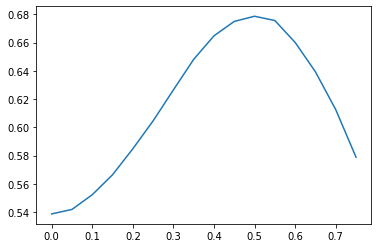

In [39]:
pred_test = lrmodel.predict_proba(X_test)
y_test_observed = y_test.reshape((y_test.shape[0],1))

from sklearn import metrics

test_predprob = pred_test[:,1].reshape((y_test.shape[0],1))

prob_array = np.around(np.arange(0,0.8,0.05), decimals=2)
accscore_array = np.zeros(prob_array.size)
i=0
for p in prob_array:
    y_predicted = (test_predprob>=p)*1
    accscore_array[i] = metrics.accuracy_score(y_test_observed,y_predicted)
    i=i+1

plt.plot(prob_array,accscore_array);

print('optimum probability is: ',prob_array[accscore_array == np.max(accscore_array)])

# Import feature matrix for other features and combine with text features

In [8]:
from numpy import load

X_text= load('X_textfeatures.npy')
# X_other = load('X_otherfeatures.npy')

In [77]:
print(X_text.shape)
print(X_other.shape)
print(subcateg_features.shape)

(185996, 2504)
(185996, 45)
(185996, 2)


## Create a feature matrix without text features and export

In [78]:
X_master_nontext = np.concatenate((X_other,subcateg_features),axis=1)

In [9]:
# X_master_nontext.shape
from numpy import save
from numpy import load

# save('X_master_nontext.npy', X_master_nontext)
X_master_nontext = load('X_master_nontext.npy')

In [14]:
display(input.iloc[185993:,:])

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,response
211260,87,Introducing the world's first intelligent vide...,"{""id"":337,""name"":""Gadgets"",""slug"":""technology/...",13665.0,US,the United States,1458235981,"{""id"":2051395662,""name"":""Cinch Gaming"",""slug"":...",USD,$,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1462554650,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",13665.000000,domestic,1
211261,86,"""Thank You For Choosing This Reality"" - Releas...","{""id"":44,""name"":""World Music"",""slug"":""music/wo...",3072.0,GB,the United Kingdom,1538861442,"{""id"":219776188,""name"":""Patita Pavana Das"",""is...",GBP,£,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1540191600,1.311699,"{""web"":{""project"":""https://www.kickstarter.com...",3082.728850,international,1
211262,357,"They've splattered the stage, now they wanna s...","{""id"":250,""name"":""Comic Books"",""slug"":""comics/...",16699.0,US,the United States,1563986834,"{""id"":1580350557,""name"":""Ross Sewage"",""is_regi...",USD,$,...,https://www.kickstarter.com/discover/categorie...,True,True,successful,1569437212,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",16699.660000,domestic,1
211263,6,Empowering spirited girls to embrace their ind...,"{""id"":264,""name"":""Childrenswear"",""slug"":""fashi...",325.0,US,the United States,1476821592,"{""id"":1752743711,""name"":""Tricia Steffes"",""is_r...",USD,$,...,https://www.kickstarter.com/discover/categorie...,False,False,failed,1483565240,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",325.000000,domestic,0
211264,375,The world's fastest recycled toy and science p...,"{""id"":337,""name"":""Gadgets"",""slug"":""technology/...",82450.0,US,the United States,1494861131,"{""id"":2021113368,""name"":""Strawbees"",""slug"":""st...",USD,$,...,https://www.kickstarter.com/discover/categorie...,True,True,successful,1500216689,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",82450.000000,domestic,1
211265,149,Support our mission to create Upstate New York...,"{""id"":315,""name"":""Vegan"",""slug"":""food/vegan"",""...",11803.0,US,the United States,1545153768,"{""id"":353417043,""name"":""Parlor City Vegan"",""sl...",USD,$,...,https://www.kickstarter.com/discover/categorie...,True,True,successful,1550356955,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",11803.000000,international,1
211266,11,Providing opportunity for young people aged 11...,"{""id"":284,""name"":""Musical"",""slug"":""theater/mus...",152.0,GB,the United Kingdom,1561986380,"{""id"":2138608723,""name"":""The Montgomery"",""slug...",GBP,£,...,https://www.kickstarter.com/discover/categorie...,False,False,failed,1564956000,1.263801,"{""web"":{""project"":""https://www.kickstarter.com...",157.975088,domestic,0
211267,11,A collection of enamel pins inspired by horror...,"{""id"":262,""name"":""Accessories"",""slug"":""fashion...",387.0,US,the United States,1572201792,"{""id"":465999323,""name"":""Kowai Enamel"",""slug"":""...",USD,$,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1574190263,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",387.000000,domestic,1
211268,59,"A full length Bitches in the Beehive album, re...","{""id"":40,""name"":""Indie Rock"",""slug"":""music/ind...",4360.0,US,the United States,1500159408,"{""id"":1489286499,""name"":""Bitches in the Beehiv...",USD,$,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1507232891,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",4360.000000,domestic,1
211269,33,Primer disco de AryaTara/ AryaTara first recor...,"{""id"":44,""name"":""World Music"",""slug"":""music/wo...",1813.0,M

## Create a Master matrix with Text features

In [10]:
X_master_withtext = np.concatenate((X_master_nontext,X_text),axis=1)

In [11]:
X_master_withtext.shape

(185996, 2551)

In [85]:
y=np.array(df[['response']])
y.shape

KeyError: "None of [Index(['response'], dtype='object')] are in the [columns]"

# Pre-launch Modeling on master without text features

This feature matrix will include all features except the text features and the 1st "No_of_backers" feature (Col. selected from 1 onwards) in "X" below

In [94]:
X = X_master_nontext[:,1:]
y = np.array(df[['response']])

print(X.shape)
print(y.shape)

(185996, 46)
(185996, 1)


In [95]:
#Create test set
from sklearn.model_selection import train_test_split
X_trainVal, X_test, y_trainVal, y_test = train_test_split(X, y, test_size = 0.20, random_state = 710)

#Create validation set

X_train, X_val, y_train, y_val = train_test_split(X_trainVal, y_trainVal, test_size = 0.10, random_state = 710)

In [96]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(133916, 46)
(14880, 46)
(37200, 46)


## Logistic model

In [97]:
from sklearn.linear_model import LogisticRegression

lrmodel = LogisticRegression(penalty='l1',solver='liblinear',C=0.1,random_state=710)
lrmodel.fit(X_train, y_train)

C:\Users\Hi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=710, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Choosing optimum pcutoff using validation

optimum probability is:  [0.5]


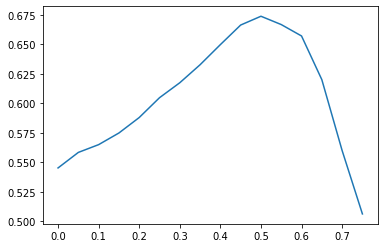

In [98]:
pred_val = lrmodel.predict_proba(X_val)
y_val_observed = y_val.reshape((y_val.shape[0],1))

from sklearn import metrics

val_predprob = pred_val[:,1].reshape((y_val.shape[0],1))

prob_array = np.around(np.arange(0,0.8,0.05), decimals=2)
accscore_array = np.zeros(prob_array.size)
i=0
for p in prob_array:
    y_predicted = (val_predprob>=p)*1
    accscore_array[i] = metrics.accuracy_score(y_val_observed,y_predicted)
    i=i+1

plt.plot(prob_array,accscore_array);

print('optimum probability is: ',prob_array[accscore_array == np.max(accscore_array)])

In [99]:
# Predict on test using 0.5 prob

pred_test = lrmodel.predict(X_test)
y_test_observed = y_test.reshape((y_test.shape[0],1))

print('test accuracy: ',metrics.accuracy_score(y_test_observed,pred_test))

test accuracy:  0.6656720430107527


# Pre-launch Modeling on Master feature dataset with  text

## Train test split

In [12]:
X = X_master_withtext[:,1:]
y = np.array(df[['response']])

print(X.shape)
print(y.shape)

(185996, 2550)
(185996, 1)


In [13]:
#Create test set
from sklearn.model_selection import train_test_split
X_trainVal, X_test, y_trainVal, y_test = train_test_split(X, y, test_size = 0.20, random_state = 710)

In [14]:
#Create validation set

X_train, X_val, y_train, y_val = train_test_split(X_trainVal, y_trainVal, test_size = 0.10, random_state = 710)

In [15]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(133916, 2550)
(14880, 2550)
(37200, 2550)


## Logistic Model

In [16]:
from sklearn.linear_model import LogisticRegression

lrmodel = LogisticRegression(penalty='l1',solver='liblinear',C=0.1,random_state=710)
lrmodel.fit(X_train, y_train)

C:\Users\Hi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=710, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Choose optimum pcutoff for overall accuracy using validation set

optimum probability is:  [0.5]


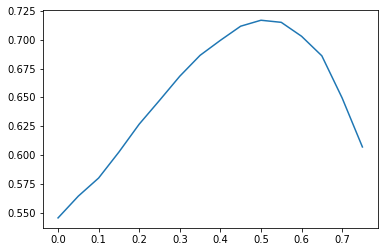

In [17]:
pred_val = lrmodel.predict_proba(X_val)
y_val_observed = y_val.reshape((y_val.shape[0],1))

from sklearn import metrics

val_predprob = pred_val[:,1].reshape((y_val.shape[0],1))

prob_array = np.around(np.arange(0,0.8,0.05), decimals=2)
accscore_array = np.zeros(prob_array.size)
i=0
for p in prob_array:
    y_predicted = (val_predprob>=p)*1
    accscore_array[i] = metrics.accuracy_score(y_val_observed,y_predicted)
    i=i+1

plt.plot(prob_array,accscore_array);

print('optimum probability is: ',prob_array[accscore_array == np.max(accscore_array)])

In [18]:
# Predict on test using 0.5 prob

pred_test = lrmodel.predict(X_test)
y_test_observed = y_test.reshape((y_test.shape[0],1))

print('test accuracy: ',metrics.accuracy_score(y_test_observed,pred_test))

test accuracy:  0.7141397849462365


# Post launch modeling  - including backers feature (with text features)

In [19]:
X = X_master_withtext
y = np.array(df[['response']])

print(X.shape)
print(y.shape)

(185996, 2551)
(185996, 1)


## Train test split

In [20]:
#Create test set
from sklearn.model_selection import train_test_split
X_trainVal, X_test, y_trainVal, y_test = train_test_split(X, y, test_size = 0.20, random_state = 710)


#Create validation set

X_train, X_val, y_train, y_val = train_test_split(X_trainVal, y_trainVal, test_size = 0.10, random_state = 710)


In [21]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(133916, 2551)
(14880, 2551)
(37200, 2551)


## Logistic model

In [22]:
from sklearn.linear_model import LogisticRegression

lrmodel = LogisticRegression(penalty='l1',solver='liblinear',C=0.1,random_state=710)
lrmodel.fit(X_train, y_train)

C:\Users\Hi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Hi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=710, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Choose optimum  pcutoff using validation set

optimum probability is:  [0.5]


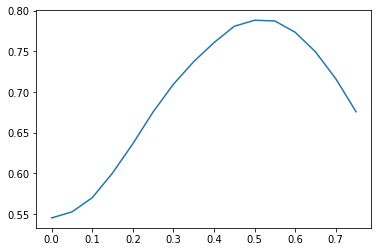

In [23]:
pred_val = lrmodel.predict_proba(X_val)
y_val_observed = y_val.reshape((y_val.shape[0],1))

from sklearn import metrics

val_predprob = pred_val[:,1].reshape((y_val.shape[0],1))

prob_array = np.around(np.arange(0,0.8,0.05), decimals=2)
accscore_array = np.zeros(prob_array.size)
i=0
for p in prob_array:
    y_predicted = (val_predprob>=p)*1
    accscore_array[i] = metrics.accuracy_score(y_val_observed,y_predicted)
    i=i+1

plt.plot(prob_array,accscore_array);

print('optimum probability is: ',prob_array[accscore_array == np.max(accscore_array)])

In [24]:
np.max(accscore_array)

0.7881720430107527

In [25]:
# Predict on test using 0.5 prob

pred_test = lrmodel.predict(X_test)
y_test_observed = y_test.reshape((y_test.shape[0],1))

print('test accuracy: ',metrics.accuracy_score(y_test_observed,pred_test))

test accuracy:  0.785


# TF-IDF Features - Ignore / was not useful in prediction

In [92]:
from sklearn.model_selection import train_test_split

Y = np.array(df[['response']])

X_train, X_test, y_train, y_test = train_test_split(df['processedtext'], Y, test_size=0.30, random_state=100)


In [113]:
# fit and transform the test set 
#fit: calculate a tfidf score for each word given the entire training set of texts
# transform: transform every document into an array of tf-idf scores

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase=True, analyzer='word', stop_words= 'english',ngram_range=(1,1), max_df=0.9,min_df=200)

train_tfIdf = tfidf.fit_transform(X_train.values.astype('U'))

print(tfidf.get_feature_names()[:100])


['100', '1000', '1st', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2nd', '3rd', 'abil', 'abl', 'abus', 'accept', 'access', 'accessori', 'achiev', 'act', 'action', 'activ', 'actor', 'actual', 'ad', 'adapt', 'add', 'addict', 'ador', 'adult', 'advanc', 'adventur', 'afford', 'african', 'age', 'aim', 'air', 'album', 'alien', 'aliv', 'allow', 'alon', 'alreadi', 'altern', 'alway', 'amaz', 'america', 'american', 'ancient', 'android', 'angel', 'anim', 'anniversari', 'annual', 'anoth', 'answer', 'antholog', 'anyon', 'anyth', 'anywher', 'apart', 'app', 'apparel', 'applic', 'appreci', 'arduino', 'area', 'art', 'artisan', 'artist', 'artwork', 'ask', 'aspir', 'assist', 'attempt', 'audienc', 'audio', 'authent', 'author', 'avail', 'awar', 'award', 'awardwin', 'away', 'awesom', 'babi', 'backer', 'bad', 'bag', 'bake', 'bakeri', 'band', 'bar', 'base', 'basic', 'batteri', 'battl', 'bbq', 'beach']


In [114]:
# transform the test data using the fit from train

test_tfIdf = tfidf.fit_transform(X_test.values.astype('U'))

In [115]:
train_tfIdf.shape

(130197, 1193)

In [118]:
test_tfIdf.shape

(55799, 508)

## Convert sparse matrices to ndarrays and pad test array to equalize dimensions

In [123]:
train_tfIdfscores = train_tfIdf.toarray()
test_tfIdfscores = test_tfIdf.toarray()

test_tfIdfscores = np.pad(test_tfIdfscores, ((0,0),(0,685)), 'constant')
print(train_tfIdfscores.shape)
print(test_tfIdfscores.shape)

(130197, 1193)
(55799, 1193)


In [86]:
type(train_tfIdf)

scipy.sparse.csr.csr_matrix

# Train a Naive-Bayes classifier

In [128]:
y_train.shape

(130197, 1)

In [124]:
y_train_observed = y_train.reshape((y_train.shape[0],1))
y_test_observed = y_test.reshape((y_test.shape[0],1))

In [129]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_classifier = MultinomialNB()

nb_classifier.fit(train_tfIdfscores, np.ravel(y_train))

pred_test = nb_classifier.predict_proba(test_tfIdfscores)
print(pred_test)

[[0.50024426 0.49975574]
 [0.32853869 0.67146131]
 [0.26019911 0.73980089]
 ...
 [0.51574961 0.48425039]
 [0.69177294 0.30822706]
 [0.43628625 0.56371375]]


In [ ]:
from sklearn import svm
clfrSVM = svm.SVC(kernel = 'linear' , C = 0.1)
clfrSVM.fit(train_tfIdfscores, np.ravel(y_train))

pred_test = clfrSVM.predict_proba(test_tfIdfscores)
print(pred_test)

In [102]:
pred_test[:,1].shape

(55799,)

optimum probability is:  [0.   0.05 0.1 ]


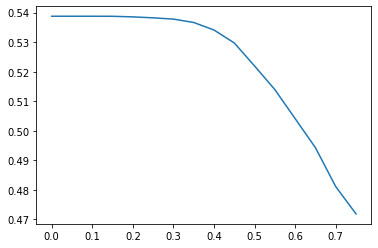

In [130]:
from sklearn import metrics

test_predprob = pred_test[:,1].reshape((y_test.shape[0],1))

prob_array = np.around(np.arange(0,0.8,0.05), decimals=2)
accscore_array = np.zeros(prob_array.size)
i=0
for p in prob_array:
    y_predicted = (test_predprob>=p)*1
    accscore_array[i] = metrics.accuracy_score(y_test_observed,y_predicted)
    i=i+1

plt.plot(prob_array,accscore_array);

print('optimum probability is: ',prob_array[accscore_array == np.max(accscore_array)])

In [106]:
y_test_predicted = (test_predprob>=0.15)*1

accuracy_tfidf = metrics.accuracy_score(y_test_observed, y_test_predicted)
print(accuracy_tfidf)

0.5387910177601749
